In [6]:
import torch
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.utils.data
from matplotlib import pyplot as plt
from model import ResNet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose(
    [
        transforms.RandomCrop(
            32, padding=4
        ),  # Random crop of size 32x32 with padding of 4 pixels
        transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
        transforms.ToTensor(),  # Convert the image to a tensor
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

trainset = torchvision.datasets.CIFAR10(
    root="./data/CIFAR10", train=True, download=True, transform=transform
)

testset = torchvision.datasets.CIFAR10(
    root="./data/CIFAR10", train=False, download=True, transform=transform
)

Files already downloaded and verified
Files already downloaded and verified


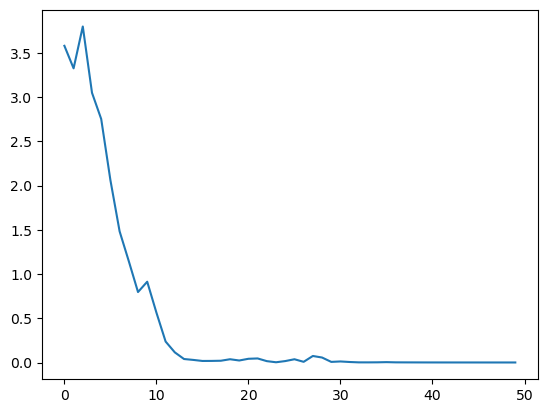

In [19]:
def main(config):
    torch.manual_seed(config['seed'])

    trainloader = torch.utils.data.DataLoader(
        trainset, batch_size=config['batch_size'], shuffle=True
    )
    testloader = torch.utils.data.DataLoader(
        testset, batch_size=config['batch_size'], shuffle=False
    )

    net = ResNet(config['hidden_dim'], config['depth'])
    net = net.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(
        net.parameters(), lr=config['lr'], weight_decay=config['wd']
    )
    scheduler = optim.lr_scheduler.LinearLR(
        optimizer,
        start_factor=1,
        end_factor=0,
        total_iters=config['epochs'],
    )
    inputs, labels = next(iter(trainloader))
    losses = []
    for epoch in range(config['epochs']):

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        losses.append(loss.item())
        loss.backward()
        torch.nn.utils.clip_grad_norm_(net.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
    plt.plot(losses)

# Define the hyperparameter lists
hyperparameter_lists = {
    'epochs': 50,
    'batch_size': 50,
    'lr': 0.01,
    'wd': 5e-4,
    'hidden_dim': 16,
    'dropout': 0,
    'depth': 9,
    'seed': 10
}

main(hyperparameter_lists)
